In [156]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [157]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [159]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [160]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [161]:
#dropping columns which are not usefull
train.drop(['Id'], axis=1, inplace=True)

In [162]:
#important variable to explore in the data is the target variable: SalePrice
#Since the end-goal is predicting house values, we'll focus on the SalePrice variable and the variables that have high correlation with it.
# Sale Price Distribution


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice'>

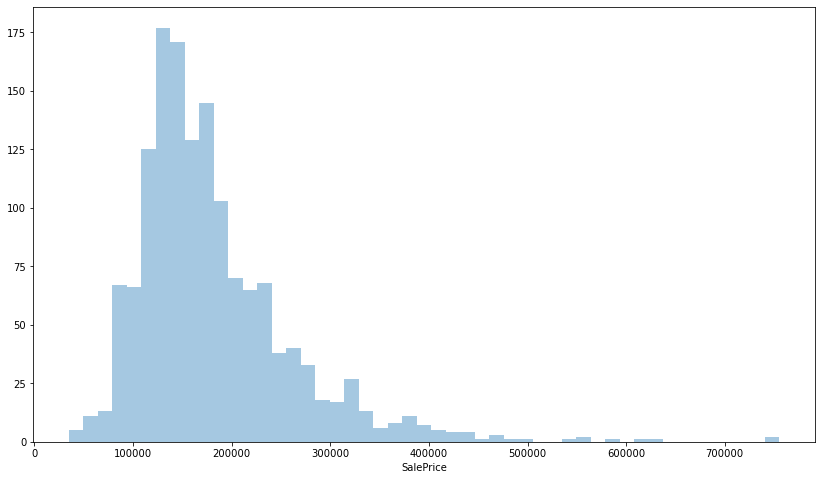

In [163]:
fig, ax = plt.subplots(figsize=(14,8))
sns.distplot(train['SalePrice'],kde=False)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


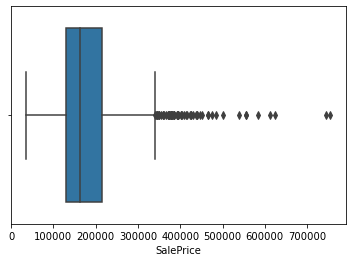

In [164]:
sns.boxplot(train['SalePrice'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


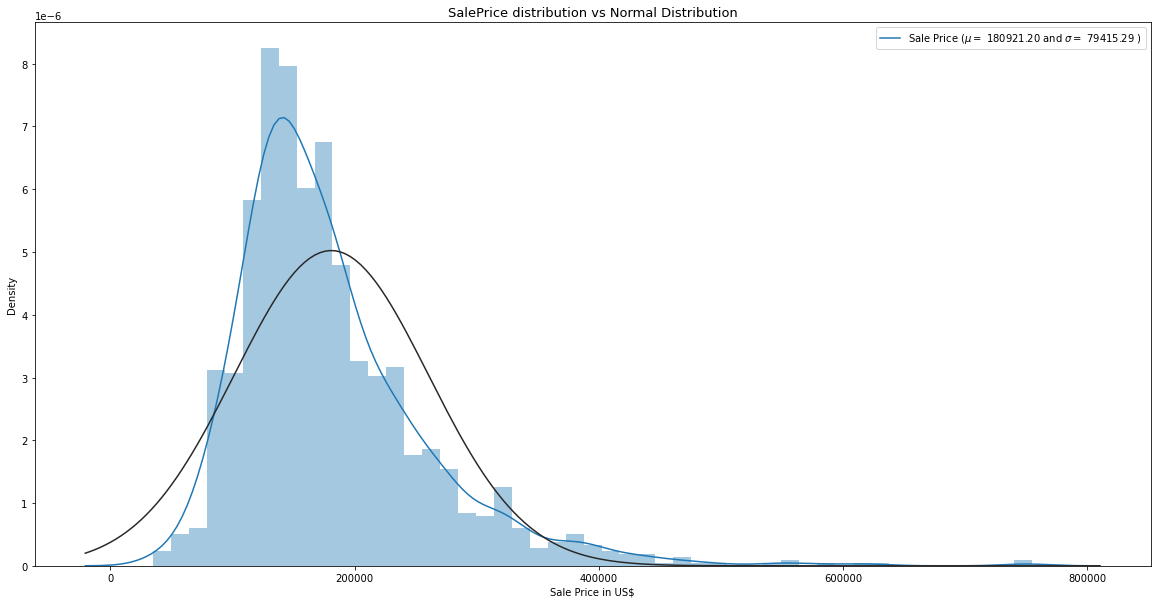

In [165]:
from scipy.stats import norm
(avge, std_dev) = norm.fit(train['SalePrice'])
plt.figure(figsize = (20,10))
sns.distplot(a=train['SalePrice'],hist=True,kde=True,fit=norm)
plt.title('SalePrice distribution vs Normal Distribution', fontsize = 13)
plt.xlabel('Sale Price in US$')
plt.legend(['Sale Price ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(avge, std_dev)],
            loc='best')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


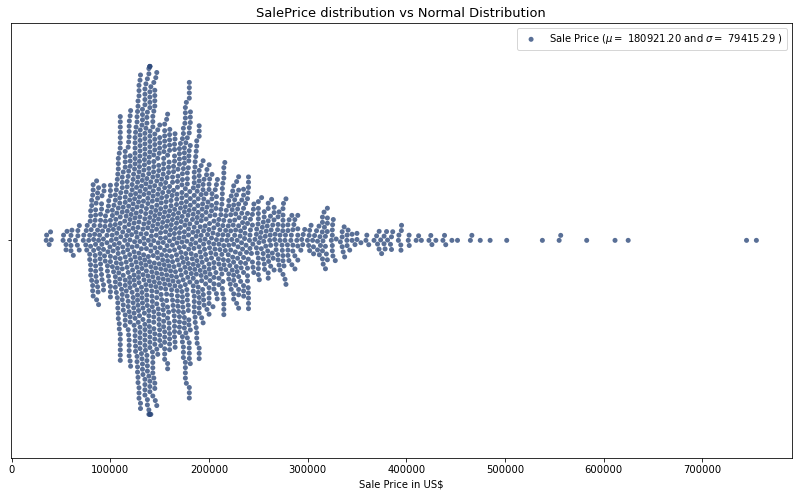

In [166]:
fig, ax = plt.subplots(figsize=(14,8))
sns.swarmplot(train['SalePrice'], color='#2f4b7c', alpha=0.8, ax=ax)
plt.title('SalePrice distribution vs Normal Distribution', fontsize = 13)
plt.xlabel('Sale Price in US$')
plt.legend(['Sale Price ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(avge, std_dev)],
            loc='best')
plt.show()

In [167]:
print(train['SalePrice'].describe().apply(lambda x: '{:,.1f}'.format(x)))

count      1,460.0
mean     180,921.2
std       79,442.5
min       34,900.0
25%      129,975.0
50%      163,000.0
75%      214,000.0
max      755,000.0
Name: SalePrice, dtype: object


<AxesSubplot:>

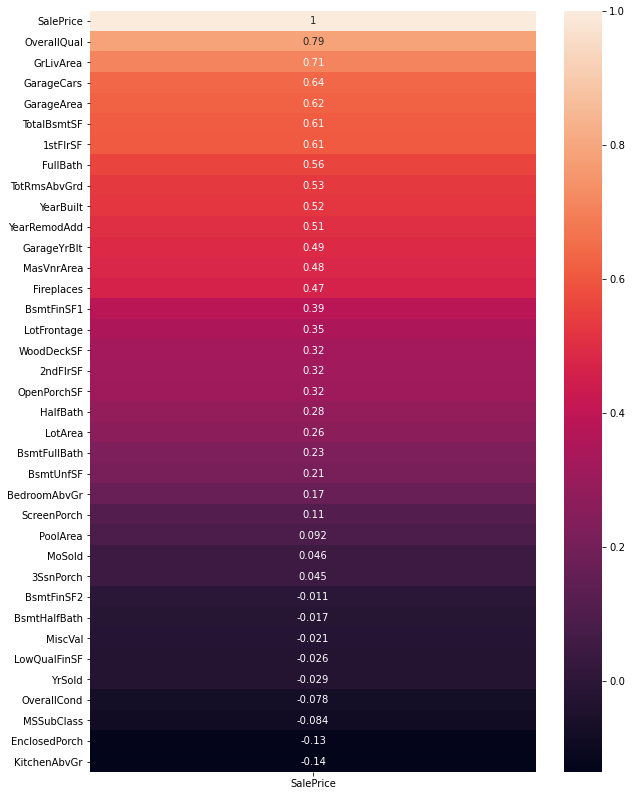

In [168]:
#Correlation with Sale Price 
fig, ax = plt.subplots(figsize=(10,14))
saleprice_corr = train.corr()[['SalePrice']].sort_values(
  by='SalePrice', ascending=False)
sns.heatmap(saleprice_corr, annot=True, ax=ax)

In [169]:
##Examining the Different Correlation Degrees

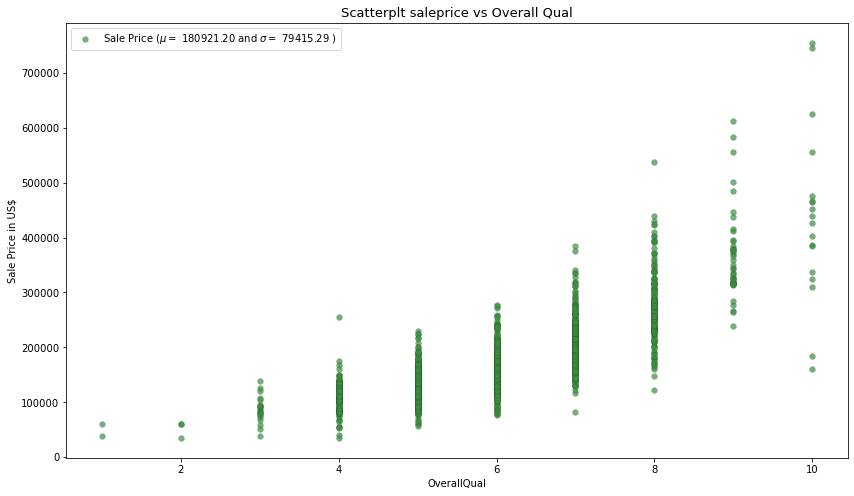

In [170]:
# High Correlation
fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(x= train['OverallQual'], y=train['SalePrice'], color="#388e3c", 
           edgecolors="#000000", linewidths=0.1, alpha=0.7);
plt.title('Scatterplt saleprice vs Overall Qual', fontsize = 13)
plt.xlabel('OverallQual')
plt.ylabel('Sale Price in US$')
plt.legend(['Sale Price ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(avge, std_dev)],
            loc='best')
plt.show()

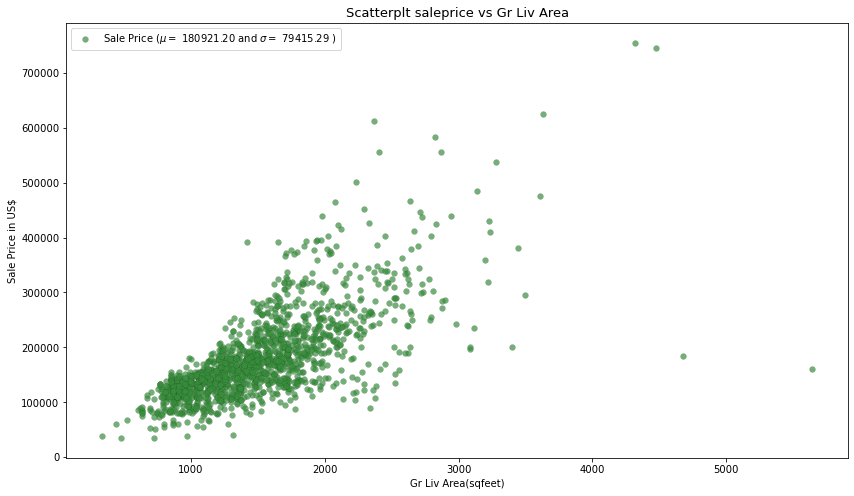

In [171]:

fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(x=train['GrLivArea'], y=train['SalePrice'], color="#388e3c", 
           edgecolors="#000000", linewidths=0.1, alpha=0.7);
plt.title('Scatterplt saleprice vs Gr Liv Area', fontsize = 13)
plt.xlabel('Gr Liv Area(sqfeet)')
plt.ylabel('Sale Price in US$')
plt.legend(['Sale Price ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(avge, std_dev)],
            loc='best')
plt.show()

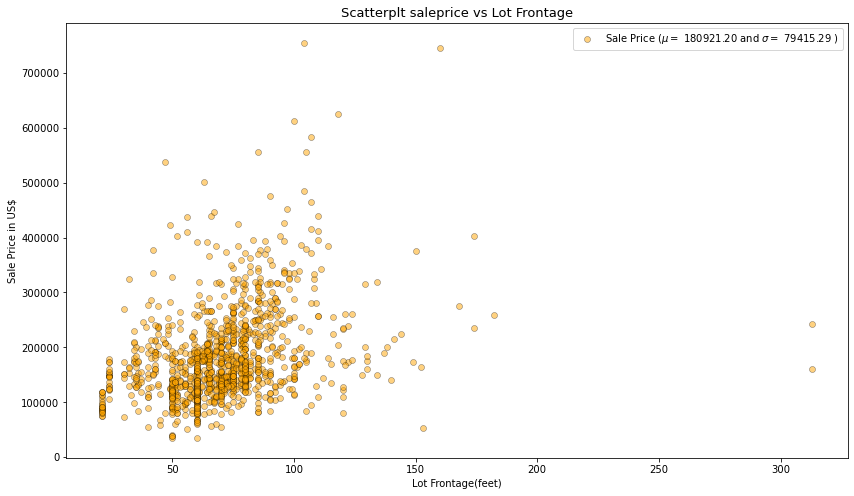

In [172]:
#Moderate Correlation
fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(x=train['LotFrontage'], y=train['SalePrice'], color="orange", 
           edgecolors="#000000", linewidths=0.5, alpha=0.5);
plt.title('Scatterplt saleprice vs Lot Frontage', fontsize = 13)
plt.xlabel('Lot Frontage(feet)')
plt.ylabel('Sale Price in US$')
plt.legend(['Sale Price ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(avge, std_dev)],
            loc='best')
plt.show()

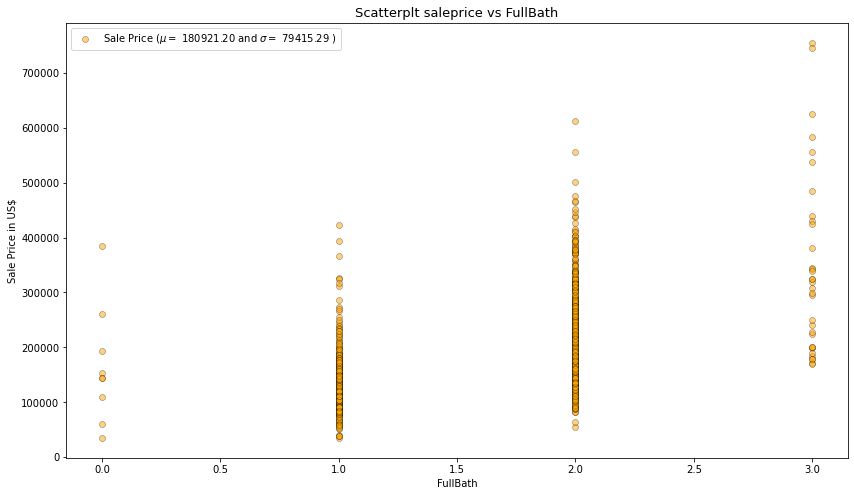

In [173]:
fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(x=train['FullBath'], y=train['SalePrice'], color="orange", 
           edgecolors="#000000", linewidths=0.5, alpha=0.5);
plt.title('Scatterplt saleprice vs FullBath', fontsize = 13)
plt.xlabel('FullBath')
plt.ylabel('Sale Price in US$')
plt.legend(['Sale Price ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(avge, std_dev)],
            loc='best')
plt.show()

In [174]:
# Low Correlation

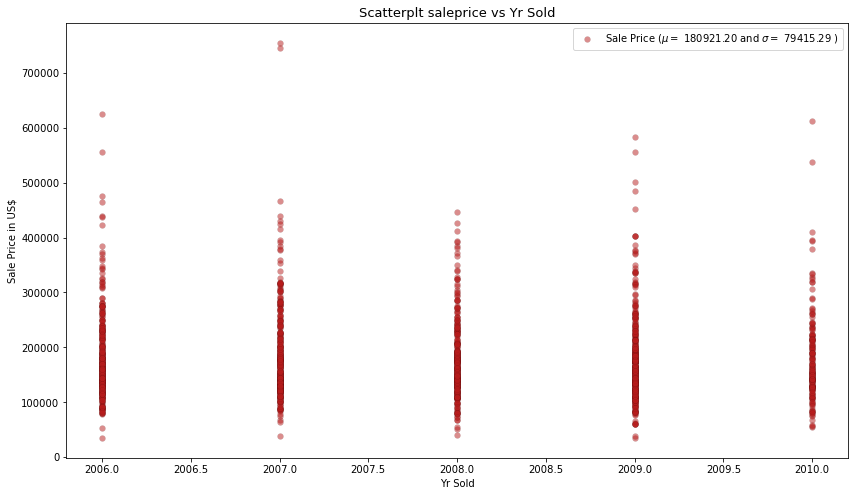

In [175]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(x=train['YrSold'], y=train['SalePrice'], color="#b71c1c", 
           edgecolors="#000000", linewidths=0.1, alpha=0.5);

plt.title('Scatterplt saleprice vs Yr Sold', fontsize = 13)
plt.xlabel('Yr Sold')
plt.ylabel('Sale Price in US$')
plt.legend(['Sale Price ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(avge, std_dev)],
            loc='best')
plt.show()

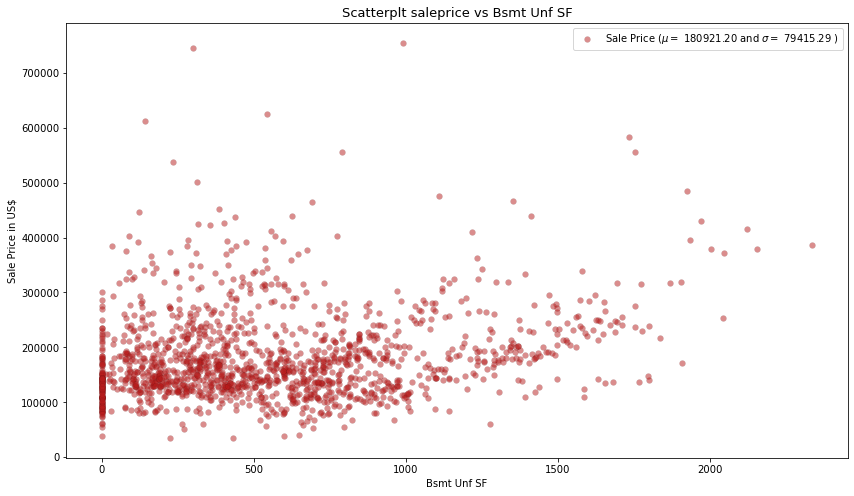

In [176]:
fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(x=train['BsmtUnfSF'], y=train['SalePrice'], color="#b71c1c", 
           edgecolors="#000000", linewidths=0.1, alpha=0.5);
plt.title('Scatterplt saleprice vs Bsmt Unf SF', fontsize = 13)
plt.xlabel('Bsmt Unf SF')
plt.ylabel('Sale Price in US$')
plt.legend(['Sale Price ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(avge, std_dev)],
            loc='best')
plt.show()

In [177]:
# since sale price is not normally distributes and is left skwed we can normalise natural log and then see the distribution.
train['SalePrice'] = np.log(train['SalePrice'])
train['SalePrice'].head()



0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


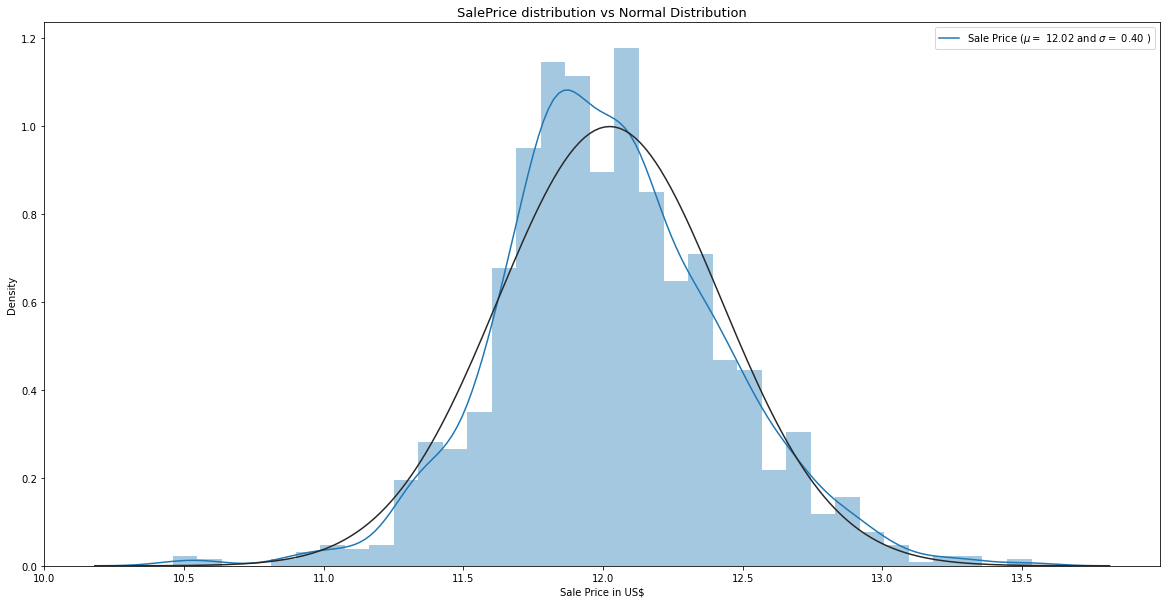

In [178]:
(avge, std_dev) = norm.fit(train['SalePrice'])
plt.figure(figsize = (20,10))
sns.distplot(a=train['SalePrice'],hist=True,kde=True,fit=norm)
plt.title('SalePrice distribution vs Normal Distribution', fontsize = 13)
plt.xlabel('Sale Price in US$')
plt.legend(['Sale Price ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(avge, std_dev)],
            loc='best')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


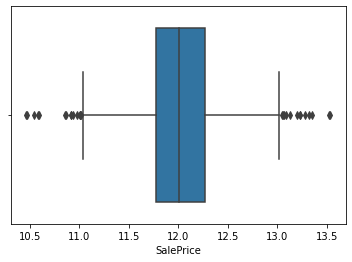

In [179]:
sns.boxplot(train['SalePrice'], orient='v')
plt.show()

In [180]:
#Removing the outliers
def outliers(variable):
  sorted(train[variable])
  Q1,Q3 = np.percentile(train[variable],[25,75])
  IQR = Q3-Q1
  lr = Q1 - (1.5*IQR)
  ur = Q3 + (1.5*IQR)
  return ur,lr

ur,lr = outliers('SalePrice')

train = train.drop(train[(train['SalePrice']<lr ) | (train['SalePrice']>ur)].index)

In [181]:
train.shape

(1460, 80)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


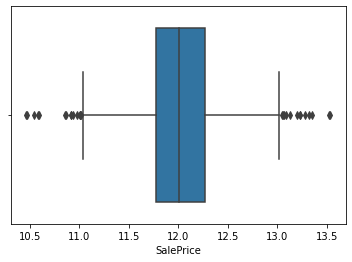

In [182]:
sns.boxplot(train['SalePrice'], orient='v')
plt.show()